# Project Title : Hand Gesture Recognition Using Edge ML

### Project Members
### Name: Velmurugan S (EE21Z007)
### Name: Rahul R (EE20M064)
### Name: Vankudothu Roshan (EE17B152)

### Abstract

Gestures are movements that convey information and thus complement oral communication or by
themselves constitute a form of communication between people. The function of a hand gesture
recognition system is to identify the type of movement, from a given set of movements, and the
instant when that movement is performed. Gesture recognition systems have multiple applications
including sign language translation, bionics, human-machine interaction, gamming, and virtual
reality. For this reason, hand gesture recognition is a problem where many researchers have
focused their attention too.
The main objective is to develop the Accelerometer and Gyroscope based Gesture recognition
algorithm using machine learning. First, the acceleration data of a gesture is collected and

extraction of the discriminative information done in the algorithm. The first step of accelerometer-
based gesture recognition system is to get the time series of a gesture motion. Previous studies have

adopted specific devices to capture acceleration data of a gesture. For example, MPU6050 sensor
can collect the orientation and acceleration of the hand.

Hardware components used:
1. Arduino UNO
2. MPU 6050 (Accelerometer + Gyroscope sensor)
3. BLE (HC-o5)

In [1]:
# numpy, pandas, matplotlib, seaborn and random libraries are used.
import random
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
#This code is used to filter any unwanted warning signs.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#This are the input data for each gesture.
df1 = pd.read_excel('Gesture1.xlsx')
df1['gesture']=1

df2 = pd.read_excel('Gesture2.xlsx')
df2['gesture']=2

df3 = pd.read_excel('Gesture3.xlsx')
df3['gesture']=3

df4 = pd.read_excel('Gesture4.xlsx')
df4['gesture']=4

df5 = pd.read_excel('Gesture5.xlsx')
df5['gesture']=5

df6 = pd.read_excel('Gesture6.xlsx')
df6['gesture']=6

df7 = pd.read_excel('Gesture7.xlsx')
df7['gesture']=7

df8 = pd.read_excel('Gesture8.xlsx')
df8['gesture']=8

In [4]:
#Concatinating all the inputs.
frames = [df1, df2, df3, df4, df5, df6, df7, df8]
result_df = pd.concat(frames)

In [5]:
#Assigning the index
index=[n for n in range(result_df.shape[0])]

In [6]:
#Assigning the index to result_Df
result_df['index']=index

In [7]:
#intial values of Result_df
result_df.set_index('index',inplace=True)
result_df.head()

,Acx,Acy,Acz,Gyx,Gyy,Gyz,gesture
index,,,,,,,
0,1412,2972,13436,-2368,46,-512,1
1,3764,2132,15180,-2352,1199,1224,1
2,3300,1080,16140,-2352,223,515,1
3,2260,1780,17020,-2368,-830,-23,1
4,2048,1264,16808,-2336,-1776,-41,1


In [8]:
#This are the column values.
columns=result_df.columns
columns

Index(['Acx', 'Acy', 'Acz', 'Gyx', 'Gyy', 'Gyz', 'gesture'], dtype='object')

In [9]:
#This code is used to find the maximum value for the ['Acx', 'Acy', 'Acz', 'Gyx', 'Gyy', 'Gyz'] for each gesture.
bycomp=result_df.groupby('gesture')
max_table=bycomp.max()
max_table=max_table.reset_index()
max_table

,gesture,Acx,Acy,Acz,Gyx,Gyy,Gyz
0,1,31556,17688,32767,-2336,32767,11060
1,2,4684,18268,24196,-2352,19646,1866
2,3,9408,17328,32767,-2400,19639,11439
3,4,17776,21156,32767,-2384,24294,15503
4,5,11148,15296,32767,-2512,32767,8300
5,6,9968,20348,32767,-2320,32767,5995
6,7,10624,16312,32767,-2512,32767,15495
7,8,6508,21480,24472,-2576,32767,21418


In [10]:
#This code is used to find the standard deviation value for the ['Acx', 'Acy', 'Acz', 'Gyx', 'Gyy', 'Gyz'] for each gesture.
std_table=bycomp.std()
std_table=std_table.reset_index()
std_table

,gesture,Acx,Acy,Acz,Gyx,Gyy,Gyz
0,1,2657.417626,5008.278397,11708.760331,68.670138,9424.386470,1492.107626
1,2,1658.264424,5993.169268,7599.094636,57.880495,5575.662511,509.020512
2,3,1848.599640,6811.685835,13683.455124,44.973759,8937.942531,1055.480445
3,4,2592.057543,6041.566337,11875.852799,59.615351,7938.416068,1400.534103
4,5,2711.183696,5094.867590,13573.946703,44.720321,11477.178412,1626.967634
5,6,3568.739436,7029.700402,14665.389991,51.599334,10279.483564,1437.795852
6,7,2667.625680,5305.048888,15192.753801,18.339766,10126.808860,1544.494853
7,8,2087.455189,7723.135295,12228.342802,24.129298,9381.392842,1379.062169


In [11]:
#This is used to convert data into numpy array.
X_array=np.array([result_df['Acx'],result_df['Acy'],result_df['Acz'],result_df['Gyx'],result_df['Gyy'],result_df['Gyz']]).T
Y_array = np.array([result_df['gesture']]).T

# Data Cleaning

## 1. Check for Duplicates

In [12]:
#This code is used to check for any Duplicates of dataset.
print('No of duplicates in dataset: {}'.format(sum(result_df.duplicated())))

No of duplicates in dataset: 0


## 2. Checking for NaN/null values

In [13]:
#This code is used to check for any NaN/Null values in dataset.
print('We have {} NaN/Null values in dataset'.format(result_df.isnull().values.sum()))

We have 0 NaN/Null values in dataset


## 3. Check for data imbalance

Number of Data generated for each gesture


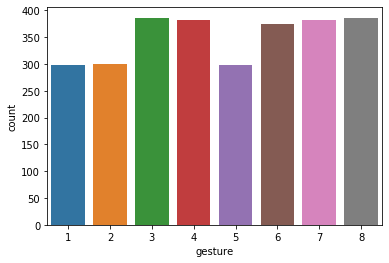

In [14]:
#This plot gives us the number of data collected fir each gesture.
print('Number of Data generated for each gesture')
sns.countplot(x='gesture', data = result_df)

# Exploratory Data Analysis

### Distribution Plots

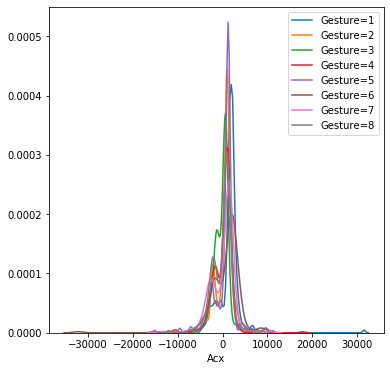

In [15]:
#This Plot gives the distribution plot of 'Acx' for all gesture.
a4_dims = (6, 6)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
sns.distplot(df1['Acx'],ax=ax,hist = False, label = 'Gesture=1')
sns.distplot(df2['Acx'],ax=ax,hist = False, label = 'Gesture=2')
sns.distplot(df3['Acx'],ax=ax,hist = False, label = 'Gesture=3')
sns.distplot(df4['Acx'],ax=ax,hist = False, label = 'Gesture=4')
sns.distplot(df5['Acx'],ax=ax,hist = False, label = 'Gesture=5')
sns.distplot(df6['Acx'],ax=ax,hist = False, label = 'Gesture=6')
sns.distplot(df7['Acx'],ax=ax,hist = False, label = 'Gesture=7')
sns.distplot(df8['Acx'],ax=ax,hist = False, label = 'Gesture=8')

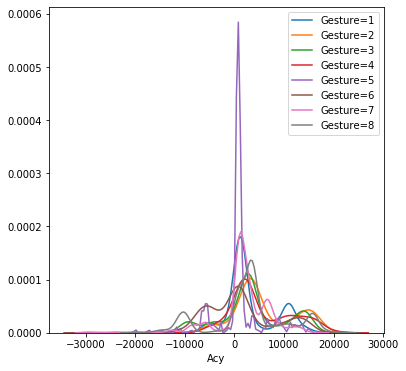

In [16]:
#This Plot gives the distribution plot of 'Acy' for all gesture.
a4_dims = (6, 6)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
sns.distplot(df1['Acy'],ax=ax,hist = False, label = 'Gesture=1')
sns.distplot(df2['Acy'],ax=ax,hist = False, label = 'Gesture=2')
sns.distplot(df3['Acy'],ax=ax,hist = False, label = 'Gesture=3')
sns.distplot(df4['Acy'],ax=ax,hist = False, label = 'Gesture=4')
sns.distplot(df5['Acy'],ax=ax,hist = False, label = 'Gesture=5')
sns.distplot(df6['Acy'],ax=ax,hist = False, label = 'Gesture=6')
sns.distplot(df7['Acy'],ax=ax,hist = False, label = 'Gesture=7')
sns.distplot(df8['Acy'],ax=ax,hist = False, label = 'Gesture=8')

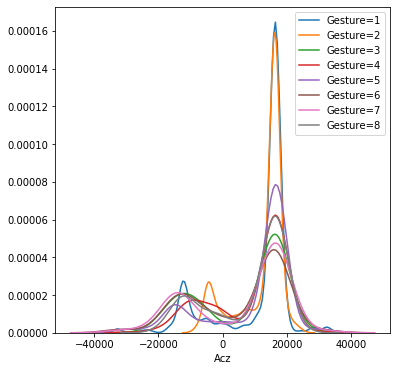

In [17]:
#This Plot gives the distribution plot of 'Acz' for all gesture.
a4_dims = (6, 6)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
sns.distplot(df1['Acz'],ax=ax,hist = False, label = 'Gesture=1')
sns.distplot(df2['Acz'],ax=ax,hist = False, label = 'Gesture=2')
sns.distplot(df3['Acz'],ax=ax,hist = False, label = 'Gesture=3')
sns.distplot(df4['Acz'],ax=ax,hist = False, label = 'Gesture=4')
sns.distplot(df5['Acz'],ax=ax,hist = False, label = 'Gesture=5')
sns.distplot(df6['Acz'],ax=ax,hist = False, label = 'Gesture=6')
sns.distplot(df7['Acz'],ax=ax,hist = False, label = 'Gesture=7')
sns.distplot(df8['Acz'],ax=ax,hist = False, label = 'Gesture=8')

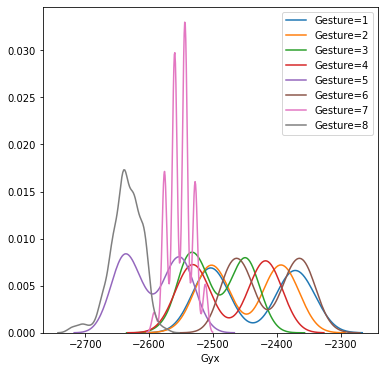

In [18]:
#This Plot gives the distribution plot of 'Gyx' for all gesture.
a4_dims = (6, 6)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
sns.distplot(df1['Gyx'],ax=ax,hist = False, label = 'Gesture=1')
sns.distplot(df2['Gyx'],ax=ax,hist = False, label = 'Gesture=2')
sns.distplot(df3['Gyx'],ax=ax,hist = False, label = 'Gesture=3')
sns.distplot(df4['Gyx'],ax=ax,hist = False, label = 'Gesture=4')
sns.distplot(df5['Gyx'],ax=ax,hist = False, label = 'Gesture=5')
sns.distplot(df6['Gyx'],ax=ax,hist = False, label = 'Gesture=6')
sns.distplot(df7['Gyx'],ax=ax,hist = False, label = 'Gesture=7')
sns.distplot(df8['Gyx'],ax=ax,hist = False, label = 'Gesture=8')

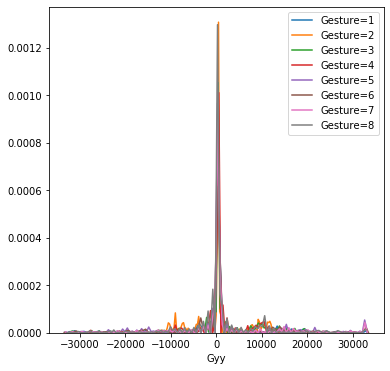

In [19]:
#This Plot gives the distribution plot of 'Gyy' for all gesture.
a4_dims = (6, 6)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
sns.distplot(df1['Gyy'],ax=ax,hist = False, label = 'Gesture=1')
sns.distplot(df2['Gyy'],ax=ax,hist = False, label = 'Gesture=2')
sns.distplot(df3['Gyy'],ax=ax,hist = False, label = 'Gesture=3')
sns.distplot(df4['Gyy'],ax=ax,hist = False, label = 'Gesture=4')
sns.distplot(df5['Gyy'],ax=ax,hist = False, label = 'Gesture=5')
sns.distplot(df6['Gyy'],ax=ax,hist = False, label = 'Gesture=6')
sns.distplot(df7['Gyy'],ax=ax,hist = False, label = 'Gesture=7')
sns.distplot(df8['Gyy'],ax=ax,hist = False, label = 'Gesture=8')

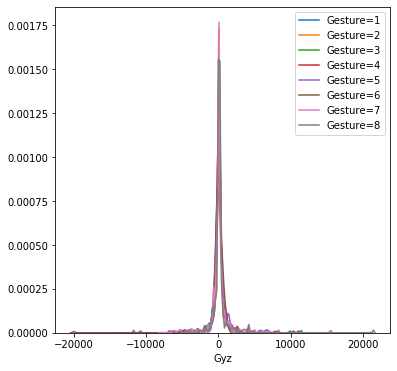

In [20]:
#This Plot gives the distribution plot of 'Gyz' for all gesture.
a4_dims = (6, 6)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
sns.distplot(df1['Gyz'],ax=ax,hist = False, label = 'Gesture=1')
sns.distplot(df2['Gyz'],ax=ax,hist = False, label = 'Gesture=2')
sns.distplot(df3['Gyz'],ax=ax,hist = False, label = 'Gesture=3')
sns.distplot(df4['Gyz'],ax=ax,hist = False, label = 'Gesture=4')
sns.distplot(df5['Gyz'],ax=ax,hist = False, label = 'Gesture=5')
sns.distplot(df6['Gyz'],ax=ax,hist = False, label = 'Gesture=6')
sns.distplot(df7['Gyz'],ax=ax,hist = False, label = 'Gesture=7')
sns.distplot(df8['Gyz'],ax=ax,hist = False, label = 'Gesture=8')

### Box Plots

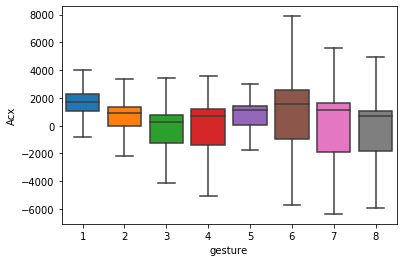

In [21]:
# This is the bar plot for all gesture vs 'Acx'.
sns.boxplot(x='gesture', y='Acx',data=result_df, showfliers=False, saturation=1)

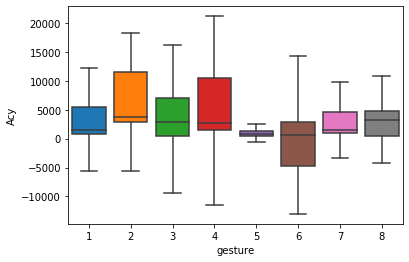

In [22]:
# This is the bar plot for all gesture vs 'Acy'.
sns.boxplot(x='gesture', y='Acy',data=result_df, showfliers=False, saturation=1)

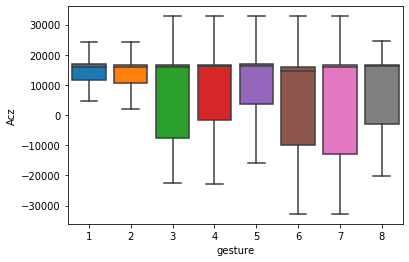

In [23]:
# This is the bar plot for all gesture vs 'Acz'.
sns.boxplot(x='gesture', y='Acz',data=result_df, showfliers=False, saturation=1)

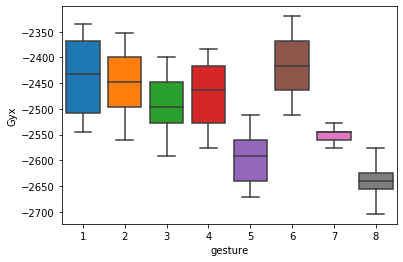

In [24]:
# This is the bar plot for all gesture vs 'Gyx'.
sns.boxplot(x='gesture', y='Gyx',data=result_df, showfliers=False, saturation=1)

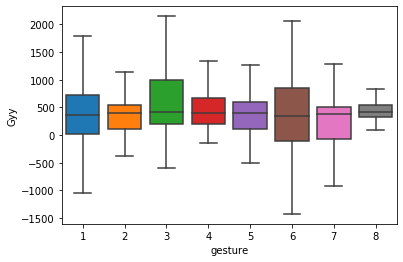

In [25]:
# This is the bar plot for all gesture vs 'Gyy'.
sns.boxplot(x='gesture', y='Gyy',data=result_df, showfliers=False, saturation=1)

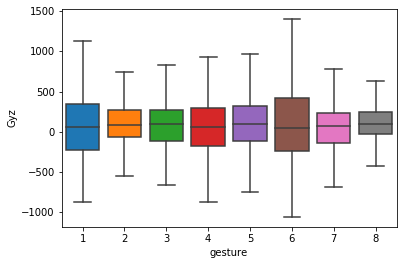

In [26]:
# This is the bar plot for all gesture vs 'Gyz'.
sns.boxplot(x='gesture', y='Gyz',data=result_df, showfliers=False, saturation=1)

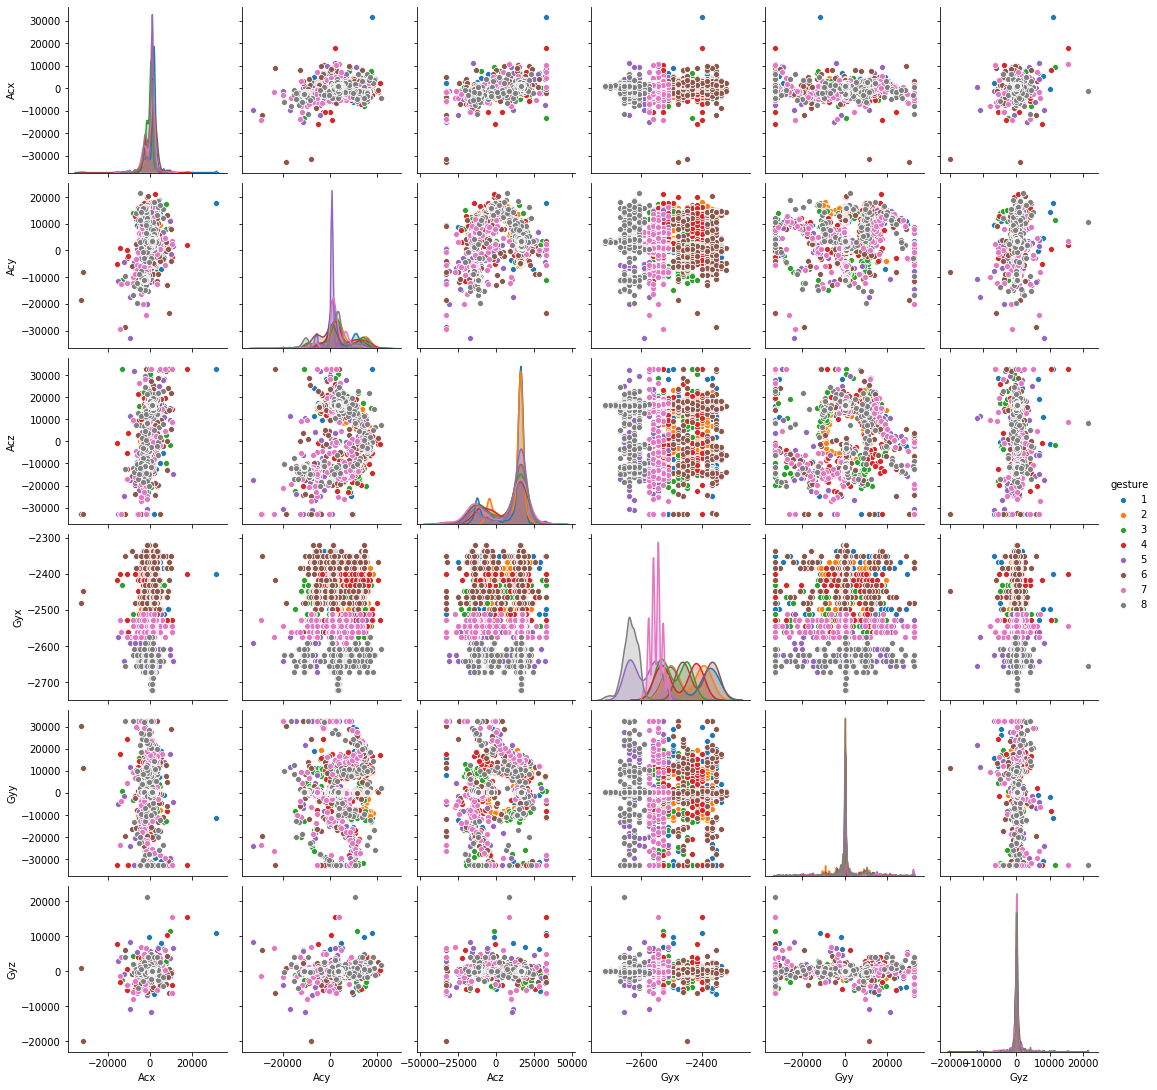

In [27]:
#pairplot of the data
sns.pairplot(result_df, hue='gesture')

# Applying t-Distributed Stochastic Neighbor Embedding on the dataset 

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.

In [28]:
from sklearn.manifold import TSNE
Y_array_plot=Y_array.reshape(1,2803)[0]

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 2803 samples in 0.088s...
[t-SNE] Computed neighbors for 2803 samples in 0.241s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2803
[t-SNE] Computed conditional probabilities for sample 2000 / 2803
[t-SNE] Computed conditional probabilities for sample 2803 / 2803
[t-SNE] Mean sigma: 56.696352
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 112.8383331, gradient norm = 0.1212533 (50 iterations in 1.651s)
[t-SNE] Iteration 100: error = 94.5309372, gradient norm = 0.0983063 (50 iterations in 0.909s)
[t-SNE] Iteration 150: error = 88.2425537, gradient norm = 0.0801274 (50 iterations in 0.797s)
[t-SNE] Iteration 200: error = 84.6177750, gradient norm = 0.0814100 (50 iterations in 0.793s)
[t-SNE] Iteration 250: error = 82.0338974, gradient norm = 0.0750635 (50 iterations in 0.773s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.033897
[t-SNE] Iteration 300: err

[t-SNE] Iteration 250: error = 66.7051163, gradient norm = 0.0116067 (50 iterations in 0.972s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.705116
[t-SNE] Iteration 300: error = 1.2971787, gradient norm = 0.0011656 (50 iterations in 1.081s)
[t-SNE] Iteration 350: error = 0.9523615, gradient norm = 0.0004622 (50 iterations in 1.084s)
[t-SNE] Iteration 400: error = 0.8333300, gradient norm = 0.0002995 (50 iterations in 0.974s)
[t-SNE] Iteration 450: error = 0.7789983, gradient norm = 0.0002370 (50 iterations in 0.961s)
[t-SNE] Iteration 500: error = 0.7511770, gradient norm = 0.0001839 (50 iterations in 0.956s)
[t-SNE] Iteration 550: error = 0.7350612, gradient norm = 0.0001639 (50 iterations in 0.956s)
[t-SNE] Iteration 600: error = 0.7240347, gradient norm = 0.0001333 (50 iterations in 1.019s)
[t-SNE] Iteration 650: error = 0.7149320, gradient norm = 0.0001232 (50 iterations in 0.956s)
[t-SNE] Iteration 700: error = 0.7078441, gradient norm = 0.0001151 (50 ite

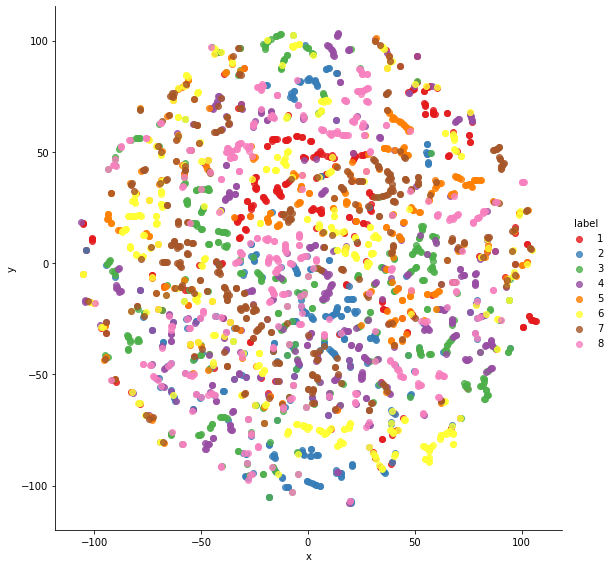

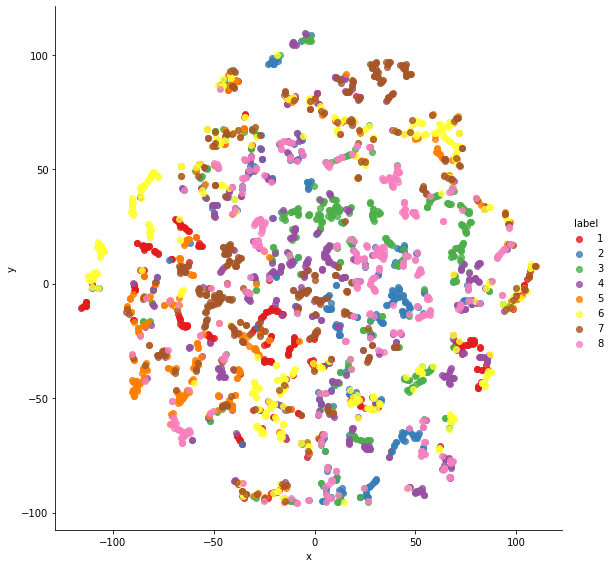

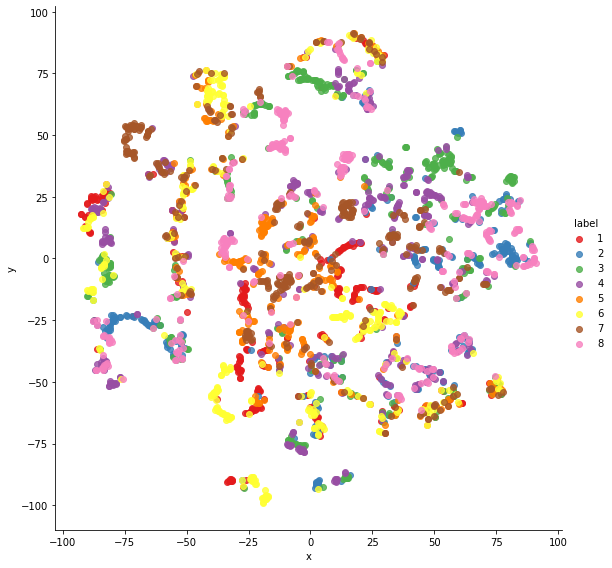

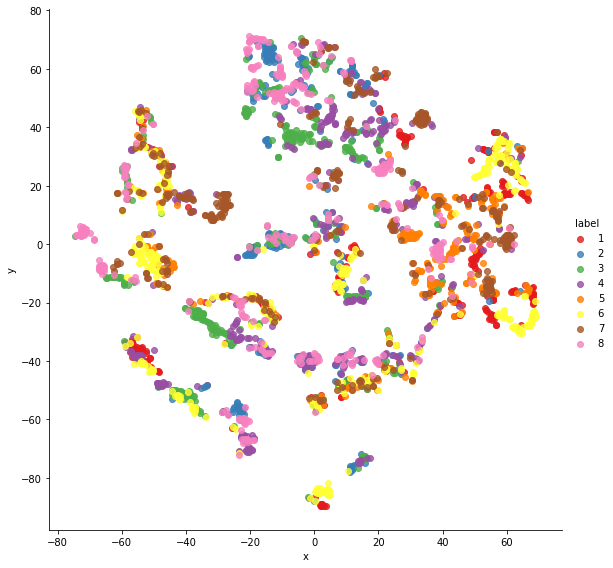

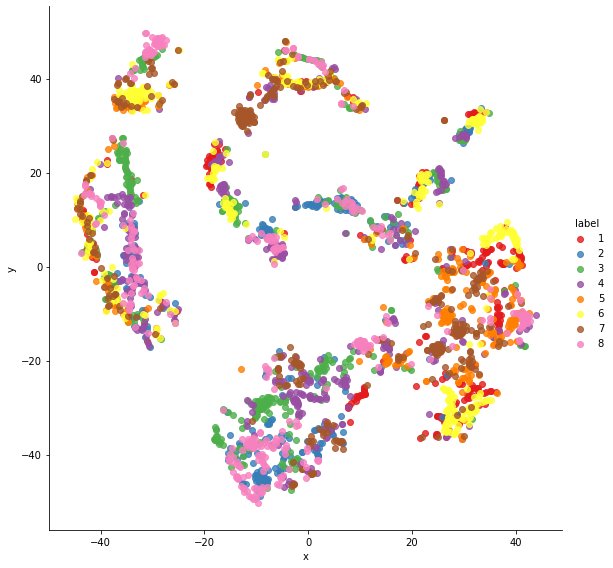

In [29]:
n_iter=1000
perplexities =[2,5,10,20,50]
for index,perplexity in enumerate(perplexities):
    X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_array)
    
    # prepare the data for seaborn         
    print('Creating plot for this t-sne visualization..')
    
    df_plot = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':Y_array_plot})
    
    sns.lmplot(data=df_plot, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1")

# Models to Predict the above data

# 1.  Building KNN from Scratch.

In [30]:
#Splitting dataset into training and testing dataset.
#This code helps in generating testing and training dataset.

rang=int(X_array.shape[0]*0.7)
index_value_train=random.sample(range(X_array.shape[0]),rang)

index_value_test=[]
for i in range(X_array.shape[0]):
    if i in index_value_train:
        continue
    else:
        index_value_test.append(i)
        
X_train_data=np.array([X_array[i] for i in index_value_train])
Y_train_data=np.array([Y_array[i] for i in index_value_train])
X_test_data=np.array([X_array[i] for i in index_value_test])
Y_test_data=np.array([Y_array[i] for i in index_value_test])
length_train_data=len(index_value_train)
length_test_data=len(index_value_test)

In [31]:
#Function that finds the euclidean distance for testing datasets.

def euclidean(test,length_train_data):
    distance=[]
    for i in range(length_train_data):
        result=sum([(test[j]-X_train_data[i][j])**2 for j in range(X_train_data.shape[1])])
        distance.append(result**0.5)
    
    return distance

In [32]:
#code to find the KNN.
def KNN(K_nearest_neighbour,test_data):
    minimum_distance_finding=euclidean(test_data,length_train_data)
    distance=euclidean(test_data,length_train_data)
    minimum_distance_finding.sort()
    class_value=[]
    for k in range(K_nearest_neighbour):
        tmp=minimum_distance_finding[k]
        index_value=distance.index(tmp)
        class_value.append(Y_train_data[index_value][0])
    
    class_index=[]
    for i in range(1,9):
        class_index.append(class_value.count(i))
    gesture=class_index.index(max(class_index))+1
    
    return gesture

In [33]:
#code to find the accuracy
def accu(predictions_KNN,y_test_value):
    accur=0
    l=len(predictions_KNN)
    for i in range(l):
        if predictions_KNN[i]==y_test_value[i]:
            accur += 1
    accuracy=accur/l
    
    return accuracy*100

### Performing KNN on testing data

In [34]:
#performing KNN on testing data.
near=[1, 10, 11, 20, 30]
accuracy_scratch_list=[]
for k in near:
    K_nearest_neighbour=k
    predicted_value=[]
    for test_data in X_test_data:
        result=KNN(K_nearest_neighbour,test_data)
        predicted_value.append(result)
    accuracy_scratch=accu(predicted_value,Y_test_data)
    accuracy_scratch_list.append([k,accuracy_scratch])

### Result

In [35]:
#Report your observation in the given table:
result= pd.DataFrame(accuracy_scratch_list,columns=['K_nearest_neighbour_value','Accuracy_in_percentage'])
print(result)

   K_nearest_neighbour_value  Accuracy_in_percentage
0                          1               64.922711
1                         10               58.382878
2                         11               56.837099
3                         20               51.367420
4                         30               49.108205


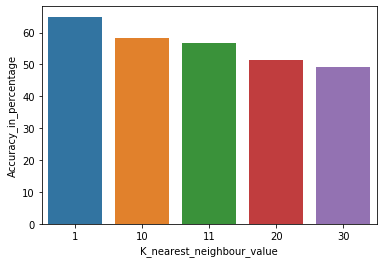

In [36]:
sns.barplot(x='K_nearest_neighbour_value', y='Accuracy_in_percentage', data=result)

The Above plot gives the accuracy accuracy  different K-nearest value.

 # 2. Logistic Regression with Grid Search

In [37]:
#Inbulit function called to perform lof=gistic regression.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [38]:
#splitting the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, test_size=0.33, random_state=42)

In [39]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg =LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [40]:
#This code is used to predict the data.
y_pred = log_reg_grid.predict(X_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy

0.19027027027027027

In [41]:
#This s the confusion matrix.
cmr = metrics.confusion_matrix(y_test, y_pred)
cmr

array([[19,  4, 11,  5,  1, 34,  2, 19],
       [ 6, 24,  0, 45,  9,  5,  1, 13],
       [ 2, 13,  6, 34,  5, 22,  2, 38],
       [ 4, 23, 15, 16,  6, 10,  1, 53],
       [ 1,  8,  7,  2,  0, 17, 14, 62],
       [11,  6,  9,  2,  4, 64, 13, 11],
       [ 6,  7, 19,  2,  1, 23,  7, 59],
       [ 4, 22,  0, 31,  0,  9, 16, 40]], dtype=int64)

Plot(Heat_map) of the confusion matrix


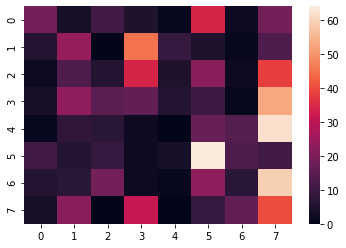

In [42]:
print('Plot(Heat_map) of the confusion matrix')
sns.heatmap(cmr)

# 3.  Kernel SVM with GridSearch

In [43]:
#Creation of empty matrix and Here we are assigning different C values and gamma values for svm.
C=[0.001,0.01,0.1,1,10,100,1000,10000]
gamma=[0.001,0.01,0.1,1,10,100,1000,10000]
matrix=np.zeros((len(C),len(gamma)),dtype=float)

In [44]:
#This code is used to find the optimal value of gamma and C.
from sklearn.svm import SVC
for c in range(len(C)):
    for g in range(len(gamma)):
        rbf_svm = SVC(kernel='rbf',C=C[c],gamma=gamma[g])
        rbf_svm.fit(X_train, y_train)
        prediction=rbf_svm.predict(X_test)
    
        accuracy=0
        for i in range(len(prediction)):
            p=prediction[i]
            y=y_test[i]
            if p == y:
                accuracy += 1
            else:
                accuracy += 0
        accuracy_percentage=(accuracy/len(prediction))*100
        matrix[c,g]=accuracy_percentage

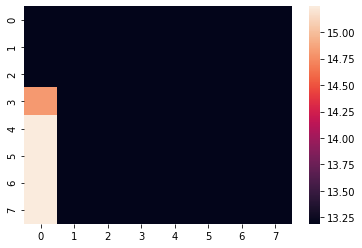

In [45]:
#heatmap for different C and gamma value of percentage.
sns.heatmap(matrix)

In [46]:
#Optimal c_value,gamma value and its accuracy.
max_value=np.amax(matrix)
for i in range(len(C)):
    for j in range(len(gamma)):
        if matrix[i,j]==max_value:
            C_max=C[i]
            gamma_max=gamma[j]
            print('The C ={} and Gamma={}'.format(C_max,gamma_max))
print('The accuracy for the given above C and Gamma value is {} %'.format(max_value))

The C =10 and Gamma=0.001
The C =100 and Gamma=0.001
The C =1000 and Gamma=0.001
The C =10000 and Gamma=0.001
The accuracy for the given above C and Gamma value is 15.243243243243242 %


# 4.  Decision Trees

In [47]:
#Sklearn is used to perform Decision tree.
from sklearn.tree import DecisionTreeClassifier

In [48]:
#Training the data
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###  Prediction and Evaluation 

In [49]:
#This are the predicted value.
predictions = dtree.predict(X_test)

In [50]:
#This code is used to find the accuracy.
accuracy=0
for i in range(len(predictions)):
    p=predictions[i]
    y=y_test[i]
    if p == y:
        accuracy += 1
    else:
        accuracy += 0
accuracy_percentages=(accuracy/len(predictions))*100
accuracy_percentages

65.51351351351352

In [51]:
from sklearn.metrics import confusion_matrix
matrix_decision = confusion_matrix(y_test, predictions)

print("confusion matrix",matrix_decision)

confusion matrix [[ 59   9   3   7   1  13   3   0]
 [  5  58  15  21   0   3   1   0]
 [  2  11  81  10   2   4  12   0]
 [  5  21  18  63   1   7  13   0]
 [  2   0   9   1  61   1  11  26]
 [ 15   7   4   6   0  88   0   0]
 [  2   1   9   8  20   1  83   0]
 [  0   0   1   0   8   0   0 113]]


Plot(Heat_map) of the confusion matrix


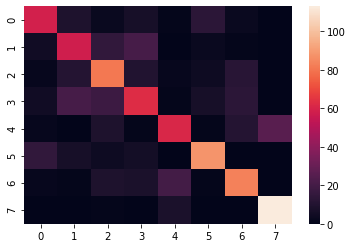

In [52]:
print('Plot(Heat_map) of the confusion matrix')
sns.heatmap(matrix_decision)

# 5.  Random Forests

In [53]:
#Sklearn is used to perform Random forest.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
#This are the predicted value
rfc_pred = rfc.predict(X_test)

In [55]:
#This code is used to find the accuracy.
accuracy=0
for i in range(len(rfc_pred )):
    p=rfc_pred [i]
    y=y_test[i]
    if p == y:
        accuracy += 1
    else:
        accuracy += 0
accuracy_percent=(accuracy/len(rfc_pred ))*100
accuracy_percent

75.13513513513513

In [56]:
from sklearn.metrics import confusion_matrix
matrix_random= confusion_matrix(y_test,rfc_pred)

print("confusion matrix",matrix_random)

confusion matrix [[ 66   4   1   4   0  19   1   0]
 [  3  79   7  13   0   1   0   0]
 [  1   7  89  10   1   6   7   1]
 [  3  11  12  81   0   7  14   0]
 [  1   0   5   1  62   0  20  22]
 [  8   5   8   1   0  98   0   0]
 [  1   0   3   4  14   0 102   0]
 [  0   0   0   1   3   0   0 118]]


Plot(Heat_map) of the confusion matrix


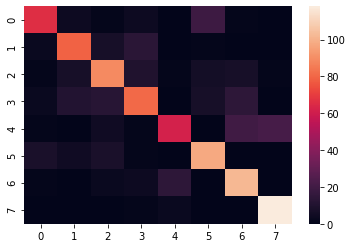

In [57]:
print('Plot(Heat_map) of the confusion matrix')
sns.heatmap(matrix_random)

# 6.   Stochastic Neighbor compression

In [58]:
#Separating the data. 
X_snc=result_df[['Acx', 'Acy', 'Acz', 'Gyx', 'Gyy', 'Gyz']]
Y_snc=result_df['gesture']

In [59]:
#This code is used to split the data into train, test.
x_train_snc, x_test_snc, y_train_snc, y_test_snc = train_test_split(X_snc,Y_snc, test_size=0.70, random_state=96)

In [60]:
#This is the code to find the standard deviation.
training_snc=x_train_snc.join(y_train_snc)
bycomp=training_snc.groupby('gesture')
std_table=bycomp.var()
std_table

,Acx,Acy,Acz,Gyx,Gyy,Gyz
gesture,,,,,,
1,3.908044e+06,1.974838e+07,1.141827e+08,4530.999328,1.030380e+08,2.043986e+06
2,2.515975e+06,4.109251e+07,5.408622e+07,3388.831683,2.798344e+07,2.909502e+05
3,4.786756e+06,4.425780e+07,1.831331e+08,1895.290842,9.919919e+07,1.884197e+06
4,4.548137e+06,3.384510e+07,1.325276e+08,3430.534333,5.680510e+07,1.539881e+06
5,9.059996e+06,3.307544e+07,1.770343e+08,2102.071683,1.639927e+08,3.118636e+06
6,1.642327e+07,5.761984e+07,2.057364e+08,2524.929367,1.213820e+08,1.018910e+06
7,9.239350e+06,3.037590e+07,2.520909e+08,344.478223,1.475363e+08,4.405821e+06
8,3.951465e+06,7.280696e+07,1.575442e+08,588.936690,8.274308e+07,9.967078e+05


In [61]:
Gamma=[sum(std_table.loc[i])**-1 for i in range(1,9)]

In [62]:
X_train_snc=np.array([training_snc['Acx'],training_snc['Acy'],training_snc['Acz'],training_snc['Gyx'],training_snc['Gyy'],training_snc['Gyz']]).T
Y_train_snc = np.array([training_snc['gesture']]).T

In [63]:
#compressed ratio taken as 6% and data set intializing.
M=int(0.50*len(Y_train_snc))
index_value_M=random.sample(range(X_train_snc.shape[0]),M)
Z_values=np.array([X_train_snc[i] for i in index_value_M])
y_hat=np.array([Y_train_snc[i] for i in index_value_M])
N=X_train_snc.shape[0]

In [64]:
#creating Q and P matrix
Q=np.zeros((N,M))
P=np.zeros((N,M))

In [65]:
#This code is used to find P matrix
Pi_value=[]
for i in range(N):
    normalise=0
    for j in range(M):
        if list(X_train_snc[i])==list(Z_values[j]):
            P[i,j]=0
        else:
            new=X_train_snc[i]-Z_values[j]
            cla=Y_train_snc[i][0]
            gamma=Gamma[cla-1]
            constant=sum([new[r]**2 for r in range(6)])
            P[i,j]=np.exp(-1*(constant)*gamma**2)
            normalise += np.exp(-1*(constant)*gamma**2)
    P[i,:]=P[i,:]/normalise
    Pi=0
    for c in range(M):
        if cla == y_hat[c][0]:
            Pi += P[i,c]
    
    P[i,:]=P[i,:]/Pi
    Pi_value.append(Pi)


In [66]:
#This code is used to find Q matrix
for i in range(N):
    for j in range(M):
        cla=Y_train_snc[i][0]
        
        if cla== y_hat[j][0]:
            Q[i,j]=1-Pi_value[i]
        else:
            Q[i,j]=-Pi_value[i]

### Finding optimised Z 

In [67]:
#finding optimised Z 
QoP=np.multiply(Q, P)
X_snc=X_train_snc.reshape(X_train_snc.shape[1],X_train_snc.shape[0])
leftside=np.matmul(X_snc,QoP)

In [68]:
QoP_T=np.transpose(QoP)
In=np.ones((QoP_T.shape[1],1))
rightside=np.matmul(QoP_T,In)
delta_matrix=np.zeros((rightside.shape[0],rightside.shape[0]))

In [69]:
for i in range(rightside.shape[0]):
    delta_matrix[i,i]=rightside[i][0]

In [70]:
delta_matrix_T=np.linalg.inv(delta_matrix) 

In [71]:
Optimised_Zvalue=np.matmul(leftside,delta_matrix_T)

In [72]:
Optimised_Zvalue=Optimised_Zvalue.reshape(Optimised_Zvalue.shape[1],Optimised_Zvalue.shape[0])

### Performing KNN with optimised Zvalue

In [73]:
K_nearest_neighbour_snc=10

In [74]:
X_test_snc=np.array([x_test_snc['Acx'],x_test_snc['Acy'],x_test_snc['Acz'],x_test_snc['Gyx'],x_test_snc['Gyy'],x_test_snc['Gyz']]).T
Y_test_snc = np.array(y_test_snc).T

In [75]:
def euclidean_snc(test_data):
    distance=[]
    for i in range(len(Optimised_Zvalue)):
        result=sum([(test_data[j]-Optimised_Zvalue[i][j])**2 for j in range(Optimised_Zvalue.shape[1])])
        distance.append(result**0.5)
    
    return distance

In [76]:
def KNN_snc(test_data,K_nearest_neighbour_snc):
    minimum_distance_finding=euclidean_snc(test_data)
    distance=euclidean_snc(test_data)
    minimum_distance_finding.sort()
    class_value=[]
    for k in range(K_nearest_neighbour_snc):
        tmp=minimum_distance_finding[k]
        index_value=distance.index(tmp)
        class_value.append(Y_train_snc[index_value][0])
    
    class_index=[]
    for i in range(1,9):
        class_index.append(class_value.count(i))
    gesture=class_index.index(max(class_index))+1
    
    return gesture

In [77]:
predicted_value_snc=[]
for test_data in X_test_snc:
    minimum_distance_finding=euclidean_snc(test_data)
    distance=euclidean_snc(test_data)
    minimum_distance_finding.sort()
    class_value=[]
    for k in range(K_nearest_neighbour_snc):
        tmp=minimum_distance_finding[k]
        index_value=distance.index(tmp)
        class_value.append(Y_train_snc[index_value][0])
    
    class_index=[]
    for i in range(1,9):
        class_index.append(class_value.count(i))
    gesture=class_index.index(max(class_index))+1
    #result=KNN_snc(K_nearest_neighbour_snc,test_data)
    result=gesture
    predicted_value_snc.append(result)
    accuracy_scratch=accu(predicted_value_snc,Y_test_snc)

In [78]:
accuracy_scratch   

12.124299541518084

# Conclusion :

> We can choose ___Random Forests___ or ___Decision Trees___ or ___KNN___.

In [79]:
#Report your observation in the given table:
data = [['Random Forests',accuracy_percent],['Decision Trees',accuracy_percentages],['KNN',accuracy_scratch_list[0][1]]]
result= pd.DataFrame(data,columns=['Model','Accuracy_in_percentage'])
print(result)

            Model  Accuracy_in_percentage
0  Random Forests               75.135135
1  Decision Trees               65.513514
2             KNN               64.922711
